# Programming Practice II
## 1 Overview
In this practice, you are asked to implement a neural network with one hidden layer for regression using NumPy only. In particular, you are expected to learn to
* implement simple activation functions;
* get familiar with gradient descent algorithms;
* get familiar with back-propagation algorithms in neural networks.

## 2 Tasks
In this section, you can start the programming practice task by task. Please pay attention to the hints as well as the API documents available online.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Define Sigmoid Function

In [2]:
def sigmoid(x):
    # TODO
    sig_x = 1/(1 + np.exp(-x))
    return sig_x

### 2.2 Define Derivative of Sigmoid Function

In [3]:
def derivative_sigmoid(x):
    # TODO
    Dsig_x = sigmoid(x) * (1 - sigmoid(x))
    return Dsig_x

### 2.3 Plot Functions

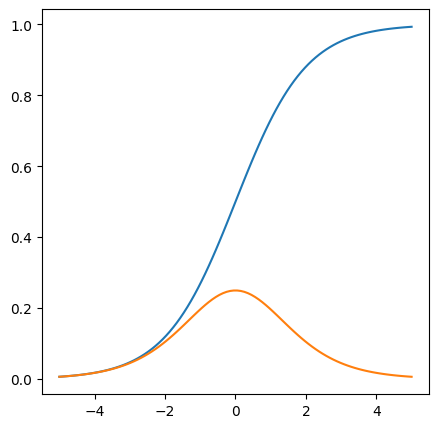

In [4]:
# TODO: plotting
x = np.linspace(-5,5,100)
sigx = sigmoid(x)
dsigx = derivative_sigmoid(x)
plt.figure(figsize = (5,5))
plt.plot(x,sigx, x,dsigx)
plt.show()

### 2.4 Define Neural Network

In [5]:
def forward_pass(x, w1, b1, w2, b2):
    # TODO
    x = x.reshape(np.shape(x)[0],1)
    Yhat = np.matmul(w2.T, (sigmoid((w1 * x) + b1))) + b2
    print(f"Shape of Yhat transpose = {np.shape(Yhat.T)}")
    return Yhat

### 2.5 Define Loss Function

In [6]:
def mse(y_true, y_pred):
    # TODO
    MSE = np.mean(np.power((y_true - y_pred),2))
    return MSE

def derivative_mse(y_true, y_pred):
    # TODO
    Dmse = -2 * np.mean(y_true - y_pred)
    return Dmse

### 2.6 Define Gradient

In [7]:
def cal_gradient(x, y, y_hat, w1, b1, w2, b2):
    # TODO
    print(f"shape of mse der = {np.shape(derivative_mse(y, y_hat))}")
    print(f"shape of sig der = {np.shape(derivative_sigmoid(w1*x + b1))}")
    dLdw1 = derivative_mse(y, y_hat).T * (x * w2 * derivative_sigmoid(w1*x + b1))
    dLdw2 = derivative_mse(y, y_hat).T * sigmoid(w1*x + b1)
    dLdb1 = derivative_mse(y, y_hat).T * (w2 * derivative_sigmoid(w1*x + b1))
    dLdb2 = derivative_mse(y, y_hat).T
    return dLdw1, dLdw2, dLdb1, dLdb2

In [8]:
d = derivative_sigmoid(w1*x + b1)
print(np.shape(d))

NameError: name 'w1' is not defined

### 2.7 Update Weights

In [9]:
def update_parameters(w1, w2, b1, b2, dLdw1, dLdw2, dLdb1, dLdb2, learning_rate):
    # TODO
    w1 -= (learning_rate * dLdw1)
    w2 -= (learning_rate * dLdw2)
    b1 -= (learning_rate * dLdb1)
    b2 -= (learning_rate * dLdb2)
    return w1, w2, b1, b2
    

### 2.8 Train Network

In [10]:
# TODO: datasets
X = np.linspace(-1,1,1000) 
Y = 0.1 * X + (X**2) + (X**3)
X = X.reshape(2,500)
Y = Y.reshape(2,500)
#print(X)
# TODO: hyperparameters
learning_rate = 0.01
hidden_neurons = 500
epochs = 5000
# TODO: parameter initialization
np.random.seed(seed = 42)
w1 = np.random.standard_normal(size = (hidden_neurons,1))
w2 = np.random.standard_normal(size = (hidden_neurons,1))
b1 = np.zeros(shape = (hidden_neurons,1))
b2 = 0
dLdw1 = 0.0
dLdw2 = 0.0
dLdb1 = 0.0
dLdb2 = 0.0
# TODO: training
counter = 0
i = 0
for it in range(epochs):
    if counter == 500:
        counter = 0
        i += 1
        print(f"The loss for the {i*500}th epoch is: {MSE}\n")
    for row in range(np.shape(X)[0]):
        Y_hat = forward_pass(X[row][:], w1, b1, w2, b2)
        print(np.shape(Y[row][:]))
        dldw1, dLdw2, dLdb1, dLdb2 = cal_gradient(X[row][:], Y[row][:], Y_hat, w1, b1, w2, b2)
        #print(np.shape(gradient))
        w1, w2, b1, b2 = update_parameters(w1, w2, b1, b2, dLdw1, dLdw2, dLdb1, dLdb2, learning_rate)
        MSE = mse(Y, Y_hat)
    counter += 1
    

Shape of Yhat transpose = (1, 1)
(500,)
shape of mse der = ()
shape of sig der = (500, 500)


ValueError: non-broadcastable output operand with shape (500,1) doesn't match the broadcast shape (500,500)

In [ ]:
d = derivative_sigmoid(w1*x + b1)
print(np.shape(d))

### 2.9 Plot Results

In [ ]:
# TODO: plotting for comparison between the prediction and ground truth

In [ ]:
# TODO: plotting for the loss